In [193]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [181]:
mnist = fetch_openml("mnist_784")

In [182]:
mnist

   0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
 1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
 2  

In [183]:
mnist.data.shape

(70000, 784)

In [184]:
mnist.target.shape

(70000,)

In [185]:
mnist.DESCR

"The MNIST database of handwritten digits with 784 features. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  \n\nWith some classification methods (particularly template-based methods, such as SV

In [186]:
print(mnist.target)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [187]:
print(mnist.target[0])

5


In [188]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [1]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GaussianNB(priors=0.3, var_smoothing=2)
GNB_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [190]:
predicted = GNB_classifier.predict(X_test)


In [191]:
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1356
           1       0.78      0.94      0.85      1630
           2       0.83      0.29      0.43      1372
           3       0.72      0.34      0.46      1481
           4       0.83      0.18      0.29      1346
           5       0.56      0.04      0.08      1240
           6       0.63      0.94      0.76      1409
           7       0.90      0.27      0.41      1461
           8       0.27      0.62      0.38      1309
           9       0.38      0.94      0.54      1396

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.67      0.55      0.51     14000



Accuracy of the Algorithm:  0.5517857142857143



Confusion matrix:
[[1152    3   10    3    4    4   60    1   93   26]
 [   0 1535    5    6    1    2   25    2   37   17]
 [  99   50  393  110    6    7  362    3  326   16]
 [  64   81   17  504    5    4   80   11  559  156]
 [  30   12   18   11  237    6  138    8  258  628]
 [  90   37    9   30    7   53   77    4  803  130]
 [   7   27    6    1    4    9 1330    0   23    2]
 [   6   14    0   17   14    0    6  392   54  958]
 [  17  197    8   16    3    9   31    1  811  216]
 [   6   18    6    4    5    1    1   14   23 1318]]


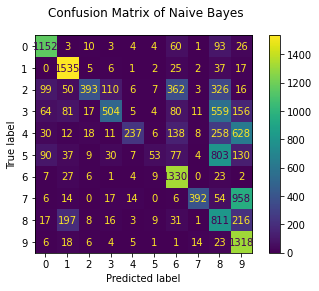

In [192]:
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Naive Bayes")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
plt.show()